### Import modules

In [2]:
import pandas as pd
import nltk

### Read dataset

In [3]:
df = pd.read_csv("spam.csv",encoding="latin-1")

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
df.rename(columns={"v1":"Class","v2":"SMS"},inplace=True)

In [8]:
df.sample(5)

,Class,SMS
1564,ham,Tmrw. Im finishing 9 doors
3465,ham,"Actually fuck that, just do whatever, do find ..."
2556,ham,Fuck babe ... What happened to you ? How come ...
2928,ham,Where wuld I be without my baby? The thought a...
1368,ham,Alright. I'm out--have a good night!


In [9]:
df.groupby('Class').describe()

SMS                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [10]:
df = df.drop_duplicates(keep=False)

In [11]:
df.groupby('Class').describe()

SMS                                                               
      count unique                                                top freq
Class                                                                     
ham    4322   4322  Go until jurong point, crazy.. Available only ...    1
spam    566    566  FreeMsg Hey there darling it's been 3 week's n...    1

### Data Visualizatuon

In [12]:
df["length"] = df["SMS"].apply(len)

In [13]:
df.head()

,Class,SMS,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

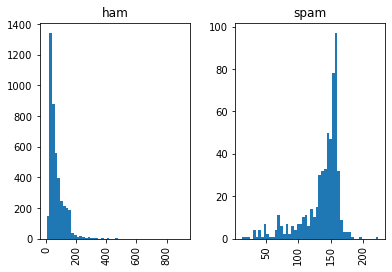

In [14]:
df.hist(column="length",by="Class",bins=50)

In [15]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Dilshi
[nltk_data]     Samarakkody\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Dilshi
[nltk_data]     Samarakkody\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Preprocessing task
- Lower Case
- Tokenization
- Removing Special Characters
- Removing stop words and punctuations

In [16]:
import string

def clean_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
                      
    text = y[:]
    y.clear()
     
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
          

In [17]:
df["sms_cleaned"] = df["SMS"].apply(clean_text)

In [18]:
df.head()

,Class,SMS,length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi .. avail bugi n great wo...
1,ham,Ok lar... Joking wif u oni...,29,ok lar ... joke wif u oni ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor ... u c alreadi say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah n't think goe usf live around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,freemsg hey darl 's 3 week 's word back 'd lik...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
Tf_vec = TfidfVectorizer(max_features=3000)
x=Tf_vec.fit_transform(df["sms_cleaned"]).toarray()

In [21]:
x.shape

(4888, 3000)

In [22]:
y= df['Class'].values

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [24]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9713701431492843
